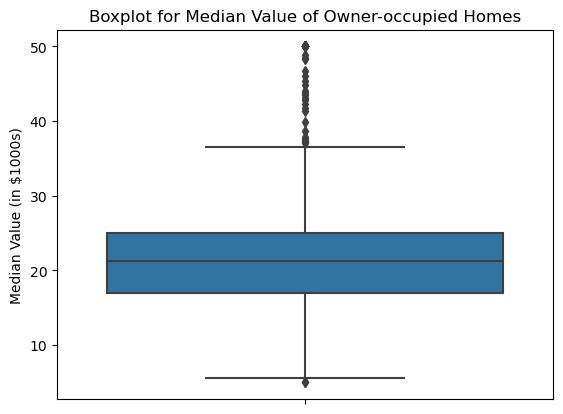

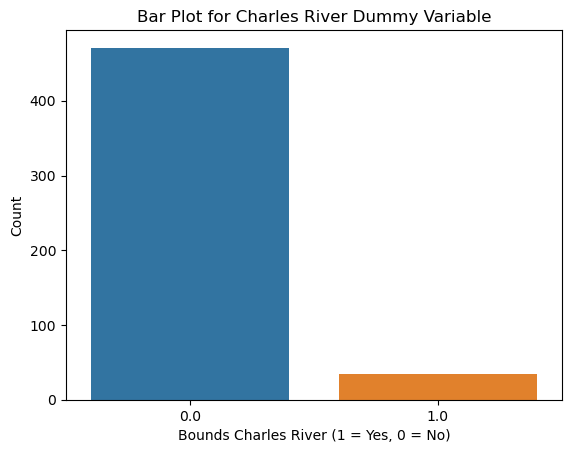

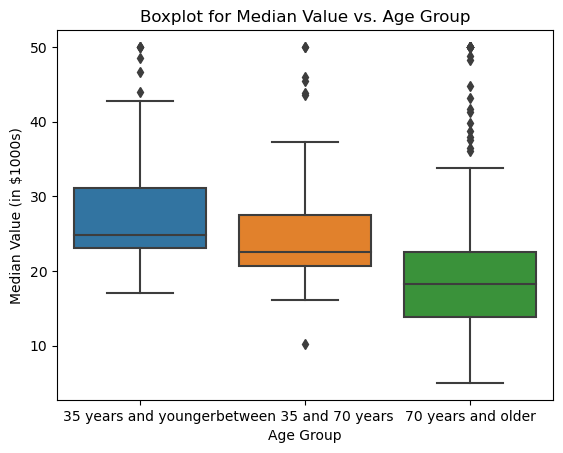

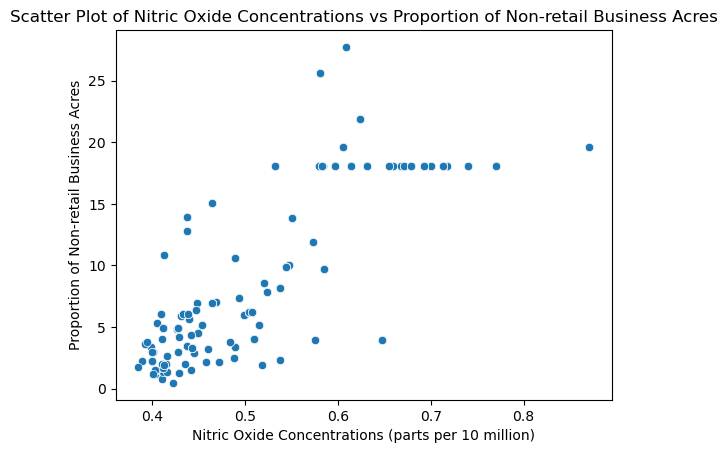

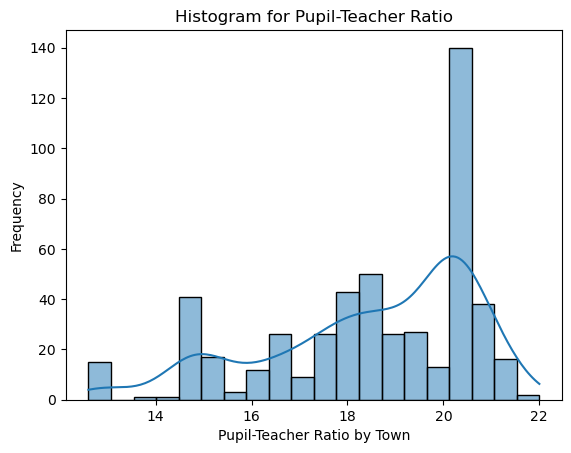

T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Correlation coefficient: 0.7636514469209149
P-value: 7.913361061242812e-98
                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 01 Nov 2023   Prob (F-statistic):           1.21e-08
Time:                        13:52:12   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
          

In [7]:
# Boston Housing Data Analysis
# This notebook aims to analyze housing data from Boston and draw insights from it.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df = pd.read_csv(boston_url)
# Display the first few rows of the dataset
boston_df.head()


sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot for Median Value of Owner-occupied Homes')
plt.ylabel('Median Value (in $1000s)')
plt.show()
sns.countplot(x=boston_df['CHAS'])
plt.title('Bar Plot for Charles River Dummy Variable')
plt.xlabel('Bounds Charles River (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()
# Discretize the AGE variable
bins = [0, 35, 70, 100]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, include_lowest=True)

sns.boxplot(x=boston_df['AGE_group'], y=boston_df['MEDV'])
plt.title('Boxplot for Median Value vs. Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value (in $1000s)')
plt.show()
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.title('Scatter Plot of Nitric Oxide Concentrations vs Proportion of Non-retail Business Acres')
plt.xlabel('Nitric Oxide Concentrations (parts per 10 million)')
plt.ylabel('Proportion of Non-retail Business Acres')
plt.show()
sns.histplot(boston_df['PTRATIO'], bins=20, kde=True)
plt.title('Histogram for Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio by Town')
plt.ylabel('Frequency')
plt.show()

import scipy.stats as stats

# Splitting the data
bounded_by_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded_by_river = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Performing the T-test
t_stat, p_val = stats.ttest_ind(bounded_by_river, not_bounded_by_river)

print(f'T-statistic: {t_stat}')
print(f'P-value: {p_val}')
# Create age groups
conditions = [
    (boston_df['AGE'] <= 35),
    (boston_df['AGE'] > 35) & (boston_df['AGE'] <= 70),
    (boston_df['AGE'] > 70)
]
groups = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
boston_df['age_group'] = np.select(conditions, groups)

# Performing ANOVA
anova_results = stats.f_oneway(
    boston_df['MEDV'][boston_df['age_group'] == '35 years and younger'],
    boston_df['MEDV'][boston_df['age_group'] == 'between 35 and 70 years'],
    boston_df['MEDV'][boston_df['age_group'] == '70 years and older']
)

print(f'F-statistic: {anova_results.statistic}')
print(f'P-value: {anova_results.pvalue}')
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f'Correlation coefficient: {correlation}')
print(f'P-value: {p_value}')
import statsmodels.api as sm

# Setting up the data
X = sm.add_constant(boston_df['DIS'])  # adding a constant (intercept term)
y = boston_df['MEDV']

model = sm.OLS(y, X).fit()
print(model.summary())

